<a href="https://colab.research.google.com/github/yustiks/photolab_2/blob/master/image_mixing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
from matplotlib import pyplot as plt
import cv2
import numpy as np
import glob
from cv2 import VideoWriter, VideoWriter_fourcc
from datetime import datetime
from PIL import Image, ImageFont, ImageDraw

def drawTextWithOutline(text, x, y, font):

    draw.text((x-2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y+2), text,(0,0,0),font=font)
    draw.text((x-2, y+2), text,(0,0,0),font=font)
    draw.text((x, y), text, (255,255,255), font=font)
    return
  
def drawText(text, pos, font):
    text = text.upper()

    w, h = draw.textsize(text, font) # measure the size the text will take

    lineCount = 1
    if w > img.width:
        lineCount = int(round((w / img.width) + 1))

    lines = []

    if lineCount > 1:

        lastCut = 0
        isLast = False
        for i in range(0,lineCount):
            if lastCut == 0:
                cut = int(len(text) / lineCount) * i
            else:
                cut = lastCut

            if i < lineCount-1:
                nextCut = int(len(text) / lineCount) * (i+1)
            else:
                nextCut = len(text)
                isLast = True

            # make sure we don't cut words in half
            if nextCut == len(text) or text[nextCut] == " ":
                pass
            else:
                while text[nextCut] != " ":
                    nextCut += 1

            line = text[cut:nextCut].strip()

            # is line still fitting ?
            w, h = draw.textsize(line, font)
            if not isLast and w > img.width:
                nextCut -= 1
                while text[nextCut] != " ":
                    nextCut -= 1

            lastCut = nextCut
            lines.append(text[cut:nextCut].strip())

    else:
        lines.append(text)


    lastY = -h
    if pos == "bottom":
        lastY = img.height - h * (lineCount+1) - 10
    return lineCount, lines, lastY
  
def draw_all(lineCount, lines, lastY, font):
  for i in range(0, lineCount):
      w, h = draw.textsize(lines[i], font)
      x = img.width/2 - w/2
      y = lastY + h
      drawTextWithOutline(lines[i], x, y, font)
      lastY = y
        
        
t = datetime.now()

name_img = input("Enter name of image:")
src1 = cv2.imread('gdrive/My Drive/' + name_img)
src2 = cv2.imread('gdrive/My Drive/' + 'tree.jpg')

height, width, depth = src1.shape
imgScale = 500/width
newX,newY = src1.shape[1]*imgScale, src1.shape[0]*imgScale
size = (int(newX),int(newY))

src1 = cv2.resize(src1, size)
img = Image.fromarray(src1)
gray = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

src2 = cv2.resize(src2, size)

video = cv2.VideoWriter('project_1.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

text = input("Enter text: ")
print(text)
if len(text)<10:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(72*imgScale))
elif len(text)<40:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(62*imgScale))
elif len(text)<60:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(52*imgScale))
else:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(42*imgScale))
img = Image.fromarray(src2)
draw = ImageDraw.Draw(img)
lineCount, lines, lastY = drawText(text, 'bottom', font)

for i in range(0,75): 
	# [blend_images]
	alpha = i/75
	beta = (1.0 - alpha)
	dst = cv2.addWeighted(gray, alpha, src1, beta, 0.0)
	img = Image.fromarray(dst)
	draw = ImageDraw.Draw(img)
	draw_all(lineCount, lines, lastY, font)
#	drawText(text, "bottom", font)
	video.write(np.array(img))
for i in range(75,400): 
	# [blend_images]
	alpha = (i - 75)/325
	beta = (1.0 - alpha)
	dst = cv2.addWeighted(src2, alpha, gray, beta, 0.0)
	img = Image.fromarray(dst)
	draw = ImageDraw.Draw(img)
	draw_all(lineCount, lines, lastY, font)
#	drawText(text, "bottom", font)
#	img.save("out.jpg")
	video.write(np.array(img))
	if i == 300:
		break
print(datetime.now()-t)
video.release()	

from moviepy.editor import *
videoclip = VideoFileClip("project_1.mp4")
videoclip.write_videofile("output_1.mp4", audio="gdrive/My Drive/hello_1.mp3")
print(datetime.now()-t)
print('output_1.mp4')

Enter name of image:input.jpg
Enter text: cvcxbxvcbxc
cvcxbxvcbxc
0:00:12.355896
[MoviePy] >>>> Building video output_1.mp4
[MoviePy] Writing video output_1.mp4


100%|██████████| 301/301 [00:02<00:00, 135.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_1.mp4 

0:00:14.974721
output_1.mp4


In [0]:
#import shutil
#shutil.rmtree('out')
import os
os.mkdir('out')

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('cracks.zip', 'r')
zip_ref.extractall('cracks')
zip_ref.close()

In [0]:
import pandas as pandas
df = pandas.read_csv('Shake positions.csv', header=0)
#df[['X','Y']]

In [23]:
from __future__ import print_function
from matplotlib import pyplot as plt
import cv2
import numpy as np
import glob
from cv2 import VideoWriter, VideoWriter_fourcc
from datetime import datetime
from PIL import Image, ImageFont, ImageDraw
import glob
def drawTextWithOutline(text, x, y, font):

    draw.text((x-2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y-2), text,(0,0,0),font=font)
    draw.text((x+2, y+2), text,(0,0,0),font=font)
    draw.text((x-2, y+2), text,(0,0,0),font=font)
    draw.text((x, y), text, (255,255,255), font=font)
    return
  
def drawText(text, pos, font):
    text = text.upper()

    w, h = draw.textsize(text, font) # measure the size the text will take

    lineCount = 1
    if w > img.width:
        lineCount = int(round((w / img.width) + 1))

    lines = []

    if lineCount > 1:

        lastCut = 0
        isLast = False
        for i in range(0,lineCount):
            if lastCut == 0:
                cut = int(len(text) / lineCount) * i
            else:
                cut = lastCut

            if i < lineCount-1:
                nextCut = int(len(text) / lineCount) * (i+1)
            else:
                nextCut = len(text)
                isLast = True

            # make sure we don't cut words in half
            if nextCut == len(text) or text[nextCut] == " ":
                pass
            else:
                while text[nextCut] != " ":
                    nextCut += 1

            line = text[cut:nextCut].strip()

            # is line still fitting ?
            w, h = draw.textsize(line, font)
            if not isLast and w > img.width:
                nextCut -= 1
                while text[nextCut] != " ":
                    nextCut -= 1

            lastCut = nextCut
            lines.append(text[cut:nextCut].strip())

    else:
        lines.append(text)


    lastY = -h
    if pos == "bottom":
        lastY = img.height - h * (lineCount+1) - 10
    return lineCount, lines, lastY
  
def draw_all(lineCount, lines, lastY, font):
  for i in range(0, lineCount):
      w, h = draw.textsize(lines[i], font)
      x = img.width/2 - w/2
      y = lastY + h
      drawTextWithOutline(lines[i], x, y, font)
      lastY = y
        
        
t = datetime.now()

# [load]
name_img = input("Enter name of image:")
src1 = cv2.imread('gdrive/My Drive/' + name_img)

imgScale = 0.5
size = (int(540*imgScale), int(540*imgScale))
shape = (int(540*imgScale), int(540*imgScale))

src1 = cv2.resize(src1, size)
img = Image.fromarray(src1)
bg = Image.open('gdrive/My Drive/' + name_img, 'r').resize(size=size)

output = 'project_2.mp4'
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

text = input("Enter text: ")
print(text)
if len(text)<10:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(72*imgScale))
elif len(text)<40:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(62*imgScale))
elif len(text)<60:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(52*imgScale))
else:
  font = ImageFont.truetype("gdrive/My Drive/impact.ttf", int(42*imgScale))
img = Image.fromarray(src1)
draw = ImageDraw.Draw(img)
lineCount, lines, lastY = drawText(text, 'bottom', font)


for i in range(25,150): 
  s = ''
  if len(str(i))==2:
    s = '0'
  name = 'gdrive/My Drive/cracks/Comp 4 - cracks_00' + s + str(i) + '.png'
  ironman = Image.open(name, 'r').resize(size=size)
  text_img = Image.new('RGBA', size, (0, 0, 0, 0))
  text_img.paste(bg, (0,0))
  text_img.paste(ironman, (0,0), mask=ironman)
  img = text_img
  draw = ImageDraw.Draw(img)
  draw_all(lineCount, lines, lastY, font)
  img.save("out/"+ str(i) + ".png")
  
img_array = []
for filename1 in range(25, 150):
    filename = "out/"+ str(filename1) + ".png"
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter(output,cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()
print(datetime.now()-t)

from moviepy.editor import *
videoclip = VideoFileClip(output)
videoclip.write_videofile("output_2.mp4", audio="gdrive/My Drive/sound2.mp3")
print(datetime.now()-t)
print('output_2.mp4')

Enter name of image:input.jpg
Enter text: Hello google
Hello google
0:00:25.485998
[MoviePy] >>>> Building video output_2.mp4
[MoviePy] Writing video output_2.mp4


100%|██████████| 125/125 [00:00<00:00, 321.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_2.mp4 

0:00:26.197319
output_2.mp4


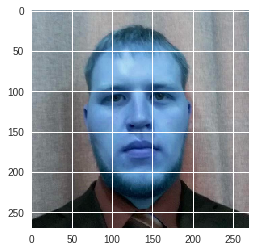

In [0]:
%matplotlib inline
imgplot = plt.imshow(img)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from mtcnn.mtcnn import MTCNN
import cv2
from datetime import datetime

t = datetime.now()
img = cv2.imread("alena.jpeg")
detector = MTCNN()
result = detector.detect_faces(img)

left_eye = result[0]['keypoints']['left_eye']
right_eye = result[0]['keypoints']['right_eye']
mouth_left = result[0]['keypoints']['mouth_left']
mouth_right = result[0]['keypoints']['mouth_right']
nose = result[0]['keypoints']['nose']
#cv2.rectangle(img,(left_eye[0]-2,left_eye[1]-2),(left_eye[0]+2,left_eye[1]+2),(0,255,0),3)
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
print(result)
print(datetime.now() - t)

ModuleNotFoundError: ignored